Step 1: Import the required python packages
We need Pandas for data manipulation, NumPy for mathematical calculations, and MatplotLib, and Seaborn for visualizations. Sklearn libraries are used for machine learning operations

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

Step 2: Load the dataset
Download the dataset from here and upload it to your notebook and read it into the pandas dataframe.

In [15]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\ML_lab\RealEstateDataV21.csv")

In [16]:

df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583.0,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4.0,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000.0,3210.0,Looking for a 10 BHK Independent House for sal...,6.0,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320.0,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3.0,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250.0,7840.0,Entire Building for sale with 7 units of singl...,5.0,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960.0,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3.0,Yes


Step 3: Data analysis
Now that we have our data ready, let's analyze and understand its trend in detail. To do that we can first describe the data below -

In [39]:
df.describe()

,Total_Area,Baths,Balcony
count,10932.000000,10932.000000,10932.000000
mean,1376.137395,2.845865,0.600073
std,1257.542318,0.866397,0.489905
min,90.000000,1.000000,0.000000
25%,750.000000,2.000000,0.000000
50%,1074.000000,3.000000,1.000000
75%,1500.000000,3.000000,1.000000
max,35000.000000,6.000000,1.000000


In [17]:
# Dropping the 'Name', 'Description', and 'Price_per_SQFT' columns from the DataFrame
df.drop(columns=['Name', 'Description', 'Price_per_SQFT'], inplace=True)

# Displaying the first 5 rows of the updated DataFrame
df.head()

,Property Title,Price,Location,Total_Area,Baths,Balcony
0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583.0,4.0,Yes
1,10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000.0,6.0,Yes
2,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320.0,3.0,No
3,7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250.0,5.0,Yes
4,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960.0,3.0,Yes


In [18]:
# Checking for missing values
df.isnull().sum()

Property Title    3596
Price             3596
Location          3596
Total_Area        3596
Baths             3596
Balcony           3596
dtype: int64

In [ ]:
df.dropna(inplace=True)  # Drop rows with missing values

In [29]:
# Checking and correcting data types
df['Total_Area'] = df['Total_Area'].astype(float)
df['Baths'] = df['Baths'].astype(float)
df['Balcony'] = df['Balcony'].map({'Yes': 1, 'No': 0})

In [41]:
# Replacing '₹', ' Cr', and ' L' with appropriate numerical multipliers and converting to float
df['Price'] = df['Price'].replace({'₹': '', ' Cr': '*1e7', ' L': '*1e5'}, regex=True)  # Remove ₹ and replace units


In [46]:
import re

# Function to convert Price to a numeric value
def convert_to_float(price):
    # Remove the currency symbol '₹' and other non-numeric characters
    price = price.replace('₹', '').strip()
    
    # Replace ' Cr' and ' L' with their numeric multipliers
    price = price.replace(' Cr', 'e7').replace(' L', 'e5')
    
    # Remove any unwanted non-numeric characters (like 'acs')
    price = re.sub(r'[^0-9e.+-]', '', price)
    
    # Convert to float
    return float(price)

# Apply the conversion function to the 'Price' column
df['Price'] = df['Price'].apply(convert_to_float)

# Check the result
df['Price'].head()


0    19910000.0
1    22510000.0
2    10100000.0
3    33310000.0
4     4801000.0
Name: Price, dtype: float64

Feature Scaling:

In [52]:
from sklearn.preprocessing import StandardScaler

# Scaling the numerical features
scaler = StandardScaler()
df[['Total_Area', 'Baths']] = scaler.fit_transform(df[['Total_Area', 'Baths']])


Outlier Detection:

In [49]:
# Z-score for detecting outliers
from scipy import stats
z_scores = stats.zscore(df[['Price', 'Total_Area', 'Baths']])
df = df[(z_scores < 3).all(axis=1)]  # Remove outliers with Z-score > 3


Splitting the Dataset:


In [51]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We can also find how the data is distributed visually using Seaborn histplot

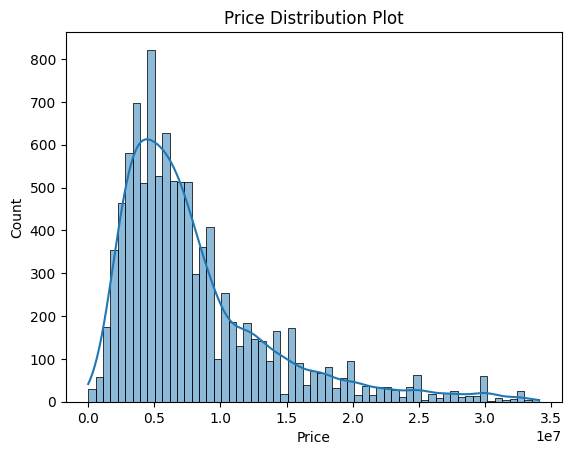

In [54]:
plt.title('Price Distribution Plot')
sns.histplot(df['Price'], kde=True) 
plt.show()

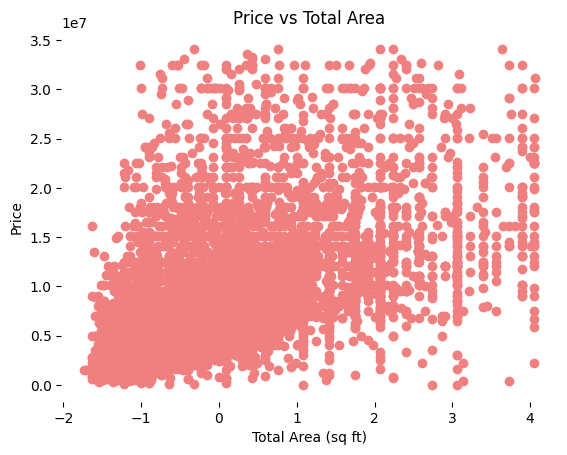

In [58]:
# Scatter plot for the relationship between Total Area and Price
plt.scatter(df['Total_Area'], df['Price'], color='lightcoral')
plt.title('Price vs Total Area')
plt.xlabel('Total Area (sq ft)')
plt.ylabel('Price')
plt.box(False)
plt.show()


Step 4: Split the dataset into dependent/independent variables

In [59]:
# Splitting variables
X = df[['Total_Area']]  # independent variable 
y = df[['Price']]       # dependent variable


Step 4: Split data into Train/Test sets
Further, split your data into training (80%) and test (20%) sets using train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Step 5: Train the regression model
Pass the X_train and y_train data into the regressor model by regressor.fit to train the model with our training data.

In [61]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Step 6: Predict the result

In [63]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

Step 7: Plot the training and test results

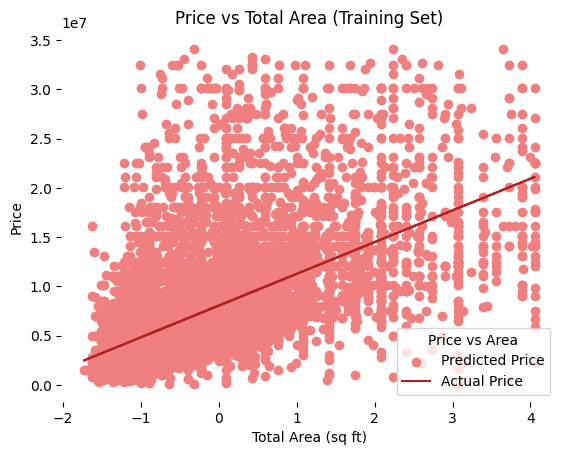

In [64]:
# Plotting the training set results
plt.scatter(X_train, y_train, color='lightcoral')
plt.plot(X_train, y_pred_train, color='firebrick')
plt.title('Price vs Total Area (Training Set)')
plt.xlabel('Total Area (sq ft)')
plt.ylabel('Price')
plt.legend(['Predicted Price', 'Actual Price'], title='Price vs Area', loc='best', facecolor='white')
plt.box(False)
plt.show()

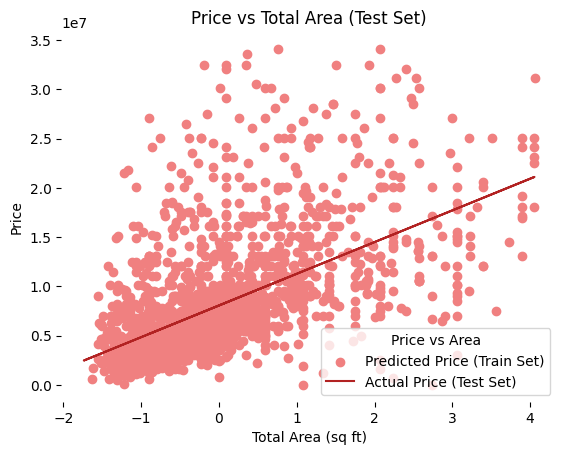

In [65]:
# Plotting the test set results
plt.scatter(X_test, y_test, color='lightcoral')
plt.plot(X_train, y_pred_train, color='firebrick')  # Using training data to draw the regression line
plt.title('Price vs Total Area (Test Set)')
plt.xlabel('Total Area (sq ft)')
plt.ylabel('Price')
plt.legend(['Predicted Price (Train Set)', 'Actual Price (Test Set)'], title='Price vs Area', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [66]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[3218174.75561276]]
Intercept: [8058814.34628588]
